In [122]:
%matplotlib inline
import numpy as np
np.random.seed(1337) 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.parsers import read_csv

sns.set_context(rc={"figure.figsize": (10.0, 6.0)})
pd.set_option('display.max_columns', 70)

from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.cross_validation import StratifiedKFold

from sklearn import linear_model

from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn.metrics import recall_score, classification_report, confusion_matrix

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier

import xgboost as xgb
from sklearn import svm

In [2]:
# window_n.dsv
df_data = read_csv("window_n.dsv", sep=";", decimal=",")

In [3]:
df_data.dtypes

ID                             int64
PRESS_CHASSIS_KEY              int64
W_START_DAY                   object
FAILURE                        int64
MIN_AVG_INK_PRESSURE         float64
MAX_AVG_INK_PRESSURE         float64
AVG_AVG_INK_PRESSURE         float64
STD_AVG_INK_PRESSURE         float64
VARIANCE_AVG_INK_PRESSURE    float64
MIN_AVG_SPEED                float64
MAX_AVG_SPEED                float64
AVG_AVG_SPEED                float64
STD_AVG_SPEED                float64
VARIANCE_AVG_SPEED           float64
MIN_MAX_SPEED                float64
MAX_MAX_SPEED                float64
AVG_MAX_SPEED                float64
STD_MAX_SPEED                float64
VARIANCE_MAX_SPEED           float64
dtype: object

In [4]:
df_data.count()

ID                           27091
PRESS_CHASSIS_KEY            27091
W_START_DAY                  27091
FAILURE                      27091
MIN_AVG_INK_PRESSURE         27091
MAX_AVG_INK_PRESSURE         27091
AVG_AVG_INK_PRESSURE         27091
STD_AVG_INK_PRESSURE         27091
VARIANCE_AVG_INK_PRESSURE    27091
MIN_AVG_SPEED                27091
MAX_AVG_SPEED                27091
AVG_AVG_SPEED                27091
STD_AVG_SPEED                27091
VARIANCE_AVG_SPEED           27091
MIN_MAX_SPEED                27091
MAX_MAX_SPEED                27091
AVG_MAX_SPEED                27091
STD_MAX_SPEED                27091
VARIANCE_MAX_SPEED           27091
dtype: int64

In [5]:
df_data.head(5)

,ID,PRESS_CHASSIS_KEY,W_START_DAY,FAILURE,MIN_AVG_INK_PRESSURE,MAX_AVG_INK_PRESSURE,AVG_AVG_INK_PRESSURE,STD_AVG_INK_PRESSURE,VARIANCE_AVG_INK_PRESSURE,MIN_AVG_SPEED,MAX_AVG_SPEED,AVG_AVG_SPEED,STD_AVG_SPEED,VARIANCE_AVG_SPEED,MIN_MAX_SPEED,MAX_MAX_SPEED,AVG_MAX_SPEED,STD_MAX_SPEED,VARIANCE_MAX_SPEED
0,17277,14,01/01/14,0,6.993622,6.993622,6.993622,0,0,28.832738,28.832738,28.832738,1.118034e-18,1.250000e-36,30.185222,30.185222,30.185222,0,0
1,17850,14,02/01/14,0,6.993622,6.993622,6.993622,0,0,28.832738,28.832738,28.832738,1.118034e-18,1.250000e-36,30.185222,30.185222,30.185222,0,0
2,17278,14,03/01/14,0,6.993622,6.993622,6.993622,0,0,28.832738,28.832738,28.832738,1.118034e-18,1.250000e-36,30.185222,30.185222,30.185222,0,0
3,17822,14,04/01/14,0,6.993622,6.993622,6.993622,0,0,28.832738,28.832738,28.832738,1.118034e-18,1.250000e-36,30.185222,30.185222,30.185222,0,0
4,2694,14,05/01/14,0,6.993622,6.993622,6.993622,0,0,28.832738,28.832738,28.832738,1.118034e-18,1.250000e-36,30.185222,30.185222,30.185222,0,0


In [6]:
df_data.describe()

,ID,PRESS_CHASSIS_KEY,FAILURE,MIN_AVG_INK_PRESSURE,MAX_AVG_INK_PRESSURE,AVG_AVG_INK_PRESSURE,STD_AVG_INK_PRESSURE,VARIANCE_AVG_INK_PRESSURE,MIN_AVG_SPEED,MAX_AVG_SPEED,AVG_AVG_SPEED,STD_AVG_SPEED,VARIANCE_AVG_SPEED,MIN_MAX_SPEED,MAX_MAX_SPEED,AVG_MAX_SPEED,STD_MAX_SPEED,VARIANCE_MAX_SPEED
count,27091.000000,27091.000000,27091.000000,27091.000000,27091.000000,27091.000000,2.709100e+04,2.709100e+04,27091.000000,27091.000000,27091.000000,27091.000000,27091.000000,27091.000000,27091.000000,27091.000000,2.709100e+04,2.709100e+04
mean,13546.000000,155.301281,0.085748,8.503731,8.699369,8.599317,8.629277e-02,1.548875e-01,26.265273,26.815550,26.542229,0.235587,1.052954,27.036806,27.710913,27.363093,2.882868e-01,1.074631e+00
std,7820.642408,156.518464,0.279997,1.065061,0.613514,0.804353,3.839876e-01,3.385089e+00,3.997511,4.880485,4.363146,0.998744,20.586358,3.842848,4.744213,4.224951,9.957703e-01,1.991439e+01
min,1.000000,14.000000,0.000000,-22.000000,-5.946818,-16.007575,0.000000e+00,0.000000e+00,0.100000,19.033333,18.317250,0.000000,0.000000,14.294915,19.456140,19.008131,0.000000e+00,0.000000e+00
25%,6773.500000,53.000000,0.000000,8.470204,8.495429,8.487315,5.000000e-19,2.500000e-37,23.830714,24.047464,23.856277,0.000000,0.000000,24.623656,25.007212,24.904710,1.936492e-18,3.750000e-36
50%,13546.000000,93.000000,0.000000,8.487315,8.508215,8.498241,1.019202e-02,1.038772e-04,25.227448,25.637778,25.443862,0.091261,0.008329,26.223614,26.730263,26.420354,1.215884e-01,1.478375e-02
75%,20318.500000,212.000000,0.000000,8.500461,8.570008,8.534470,3.057698e-02,9.349516e-04,28.690383,29.019241,28.832738,0.206022,0.042445,29.325949,29.853993,29.633290,2.796656e-01,7.821285e-02
max,27091.000000,576.000000,1.000000,11.218333,11.837500,11.370483,1.267826e+01,1.607384e+02,61.452273,100.000000,85.673219,31.118035,968.332077,64.322727,100.000000,86.988123,3.057015e+01,9.345343e+02


In [7]:
df_data["FAILURE"].value_counts()

0    24768
1     2323
Name: FAILURE, dtype: int64

In [8]:
#df_data = df_data.fillna(0)

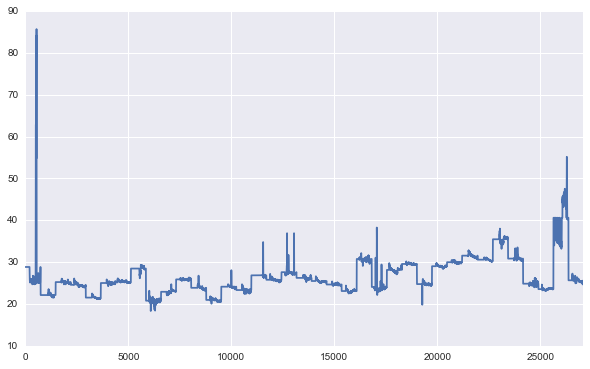

In [9]:
df_data["AVG_AVG_SPEED"].plot(kind="Line")

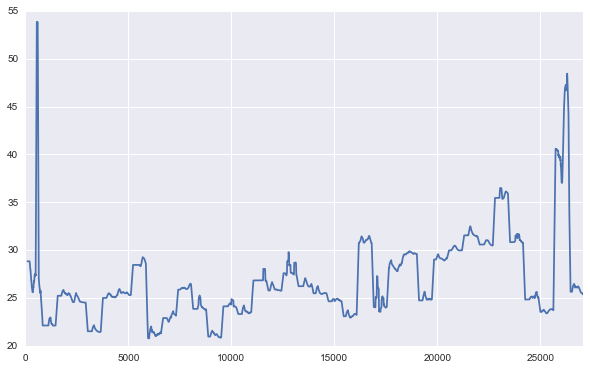

In [10]:
pd.rolling_mean(df_data["MAX_AVG_SPEED"], 100).plot()

In [11]:
df_data["FAILURE"].value_counts()

0    24768
1     2323
Name: FAILURE, dtype: int64

In [12]:
feature_columns = [u'MIN_AVG_INK_PRESSURE', u'MAX_AVG_INK_PRESSURE',
       u'AVG_AVG_INK_PRESSURE', u'STD_AVG_INK_PRESSURE', u'MIN_AVG_SPEED',
       u'MAX_AVG_SPEED', u'AVG_AVG_SPEED', u'STD_AVG_SPEED', u'MIN_MAX_SPEED',
       u'MAX_MAX_SPEED', u'AVG_MAX_SPEED', u'STD_MAX_SPEED', 'FAILURE',
       u'VARIANCE_AVG_INK_PRESSURE', u'VARIANCE_MAX_SPEED', u'VARIANCE_AVG_SPEED']

In [13]:
df_features = df_data[feature_columns]

In [14]:
df_features.shape

(27091, 16)

In [15]:
train_index = int(df_features.shape[0] * 0.6)
print train_index

16254


In [16]:
df_train = df_features.iloc[0:train_index]
df_test = df_features.iloc[train_index:]

In [17]:
df_train.shape

(16254, 16)

In [18]:
df_test.shape

(10837, 16)

In [19]:
df_train['FAILURE'].value_counts()

0    15198
1     1056
Name: FAILURE, dtype: int64

In [20]:
df_test['FAILURE'].value_counts()

0    9570
1    1267
Name: FAILURE, dtype: int64

In [21]:
X_train = df_train[df_train.columns]

In [22]:
df_train_features = df_train[df_train.columns.difference(["FAILURE"])]
df_train_y = df_train['FAILURE']

In [23]:
X_train = np.array(df_train_features)
X_train = X_train.astype(np.float32)

In [24]:
y_train = np.array(df_train_y)
y_train = y_train.astype(np.float32)

In [25]:
df_test_features = df_test[df_test.columns.difference(["FAILURE"])]
df_test_y = df_test['FAILURE']

In [26]:
X_test = np.array(df_test_features)
X_test = X_test.astype(np.float32)

In [27]:
y_test = np.array(df_test_y)
y_test = y_test.astype(np.float32)

In [28]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
sample_weight = np.array([1 if i == 0 else 8 for i in y_train])

In [124]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [161]:
param_1 = {'silent':0,
         'objective':'binary:logistic',
         "eval_metric": "auc",
         "max_depth": 3,
         #"subsample": 1.0,
         "gamma": 0.8,
         #"colsample_bytree": 0.8,
         #"min_child_weight": 0.8,
         #"max_delta_step": 1,
         #"alpha": 1.0,
        #"lambda": 1.0,
        "eta": 0.05}

In [163]:
res = {}
watchlist = [(dtest, 'eval'), (dtrain, 'train')]
model = xgb.train(param_1, dtrain, 100, watchlist, verbose_eval=True)


[0]	eval-auc:0.802473	train-auc:0.697376
[1]	eval-auc:0.802473	train-auc:0.697376
[2]	eval-auc:0.801863	train-auc:0.698845
[3]	eval-auc:0.801863	train-auc:0.698845
[4]	eval-auc:0.801863	train-auc:0.698845
[5]	eval-auc:0.801863	train-auc:0.698845
[6]	eval-auc:0.801863	train-auc:0.698845
[7]	eval-auc:0.836308	train-auc:0.725144
[8]	eval-auc:0.836366	train-auc:0.726222
[9]	eval-auc:0.836526	train-auc:0.726256
[10]	eval-auc:0.836596	train-auc:0.726147
[11]	eval-auc:0.836633	train-auc:0.726356
[12]	eval-auc:0.842732	train-auc:0.750973
[13]	eval-auc:0.842794	train-auc:0.750907
[14]	eval-auc:0.842513	train-auc:0.751238
[15]	eval-auc:0.842533	train-auc:0.751920
[16]	eval-auc:0.842521	train-auc:0.751976
[17]	eval-auc:0.842509	train-auc:0.752194
[18]	eval-auc:0.846264	train-auc:0.752953
[19]	eval-auc:0.840302	train-auc:0.755102
[20]	eval-auc:0.840202	train-auc:0.755159
[21]	eval-auc:0.840154	train-auc:0.756434
[22]	eval-auc:0.840466	train-auc:0.756159
[23]	eval-auc:0.840296	train-auc:0.756252
[2

In [164]:
y_pred = model.predict(dtest)

0.010491082

In [110]:
#logreg = linear_model.LogisticRegression(class_weight={0: 0.1, 1: 0.9})
#logreg = linear_model.LogisticRegression(solver="lbfgs", C=0.001)
logreg = svm.SVC(probability=True, kernel="linear", C=0.001)
#logreg = KNeighborsClassifier(n_neighbors=5)

In [111]:
logreg.fit(X_train, y_train, sample_weight=sample_weight)
#logreg.fit(X_train, y_train)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [112]:
logreg.score(X_test, y_test)

0.88308572483159542

In [147]:
#y_pred = logreg.decision_function(X_test)
#y_pred_class = logreg.predict(X_test)

In [114]:
#logreg.decision_function(X_test)

In [115]:
#y_pred.fill(0)

In [116]:
#print classification_report(y_test, y_pred_class, target_names=['Non failure', 'Failure'])

             precision    recall  f1-score   support

Non failure       0.88      1.00      0.94      9570
    Failure       0.00      0.00      0.00      1267

avg / total       0.78      0.88      0.83     10837



C:\Anaconda2_64\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [117]:
#confusion_matrix(y_test, y_pred)

In [165]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print roc_auc

# logreg = 0.81

0.868258930376


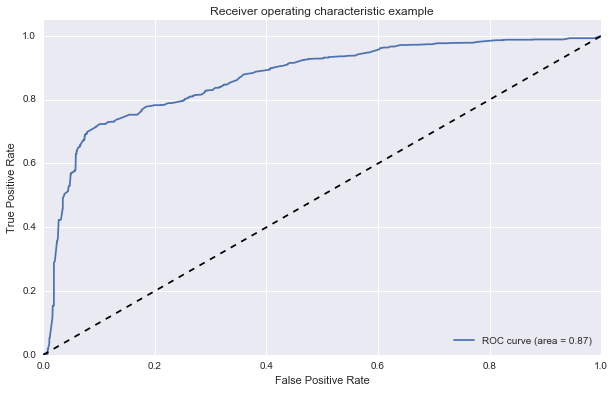

In [166]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
